In [1]:
import sys
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
sys.path.append('../code/')
import rf_regression as rfr
import plotly.express as px
from scipy import stats
import combat

/Users/anish.simhal/anaconda3/envs/neuro/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# fn = 'data.xlsx' #insert actual data here 

df = pd.read_excel(fn)
df = df[df["MPRAGE"].isin(["pass", "maybe", "fail"])]
df = df[['age', 'site_id', 'MPRAGE', 'REST1', 'FACES1', 'FACES2', 'REST2', 'T2_SPACE', 'DTI']]
df = df.dropna()
df = df.reset_index()

In [3]:
mprage_status = df['MPRAGE'].values
rest1_status = df['REST1'].values
rest2_status = df['REST2'].values
faces1_status = df['FACES1'].values
faces2_status = df['FACES2'].values
t2_status = df['T2_SPACE'].values
dti_status = df['DTI'].values

mprage_status = rfr.get_binary_passfail(mprage_status)
rest1_status = rfr.get_binary_passfail(rest1_status)
rest2_status = rfr.get_binary_passfail(rest2_status)
faces1_status = rfr.get_binary_passfail(faces1_status)
faces2_status = rfr.get_binary_passfail(faces2_status)
t2_status = rfr.get_binary_passfail(t2_status)
dti_status = rfr.get_binary_passfail(dti_status)

faces_status = 1*((faces1_status + faces2_status) > 0)
y_t1 = mprage_status
y_r1 = rest1_status*mprage_status
y_f = faces_status*rest1_status*mprage_status
y_r2 = rest2_status*faces_status*rest1_status*mprage_status
y_t2 = t2_status*rest2_status*faces_status*rest1_status*mprage_status
y_dti = dti_status*t2_status*rest2_status*faces_status*rest1_status*mprage_status

y_regression = y_t1 + y_r1 + y_f + y_r2 + y_t2 + y_dti

In [5]:
subset_features = ['age']
sitelist = df['site_id'].values
x_df = df[subset_features]
ebat = combat.combat(x_df.T, sitelist)
x_df = ebat.T

Adjusting data


found 2 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


In [6]:
len(y_regression)

201

In [7]:
age = df['age'].values

In [8]:
len(age)

201

In [9]:
min(age)

5.55753424657534

In [10]:
max(age)

11.9687214611872

In [11]:
passagelist = [] 
failagelist = [] 

passxlist = [] 
failxlist = [] 

In [13]:
passagelist = [] 
failagelist = [] 

passxlist = [] 
failxlist = [] 

for n in range(0, len(y_t1)): 
    
    if y_t1[n] == 1: 
        passagelist.append(age[n])
        passxlist.append(1)
    else: 
        failagelist.append(age[n])
        failxlist.append(1)
        
    if y_r1[n] == 1: 
        passagelist.append(age[n])
        passxlist.append(2)
    else: 
        failagelist.append(age[n])
        failxlist.append(2)
        
    if y_f[n] == 1: 
        passagelist.append(age[n])
        passxlist.append(3)
    else: 
        failagelist.append(age[n])
        failxlist.append(3)
        
    if y_r2[n] == 1: 
        passagelist.append(age[n])
        passxlist.append(4)
    else: 
        failagelist.append(age[n])
        failxlist.append(4)
        
    if y_t2[n] == 1: 
        passagelist.append(age[n])
        passxlist.append(5)
    else: 
        failagelist.append(age[n])
        failxlist.append(5)
        
    if y_dti[n] == 1: 
        passagelist.append(age[n])
        passxlist.append(6)
    else: 
        failagelist.append(age[n])
        failxlist.append(6)

In [14]:
pass_len_list = [] 
pass_mean_list = [] 
pass_sd_list = [] 
for n in range(1, 7): 
    t1_pass_mask = np.array(passxlist)==n
    foo = np.array(passagelist)*t1_pass_mask
    foo = foo[foo!=np.zeros(1,foo.dtype)]
    pass_mean_list.append(np.mean(foo))
    pass_sd_list.append(np.std(foo))
    pass_len_list.append(len(foo))

In [15]:
pass_len_list

[188, 168, 121, 96, 63, 20]

In [16]:
fail_len_list = [] 
fail_mean_list = [] 
fail_sd_list = [] 
for n in range(1, 7): 
    t1_fail_mask = np.array(failxlist)==n
    foo = np.array(failagelist)*t1_fail_mask
    foo = foo[foo!=np.zeros(1,foo.dtype)]
    fail_mean_list.append(np.mean(foo))
    fail_sd_list.append(np.std(foo))
    fail_len_list.append(len(foo))

In [17]:
pass_mean_list

[8.75986592830077,
 8.846703087627727,
 9.303192573304628,
 9.261888793759491,
 9.4240124664782,
 9.9653538812785]

In [18]:
fail_mean_list

[7.7926589392342684,
 7.936764909367641,
 7.780913242009123,
 8.181124157425513,
 8.36555489378597,
 8.557194934281878]

In [19]:
pass_sd_list = np.array(pass_sd_list) / np.sqrt(np.array(pass_len_list))
fail_sd_list = np.array(fail_sd_list) / np.sqrt(np.array(fail_len_list))

In [20]:
pass_sd_list

array([0.12524875, 0.13539784, 0.1503801 , 0.16548484, 0.20294045,
       0.30574362])

In [21]:
fail_sd_list

array([0.51026532, 0.25275587, 0.16159965, 0.1646458 , 0.14454777,
       0.12799613])

<IPython.core.display.Javascript object>


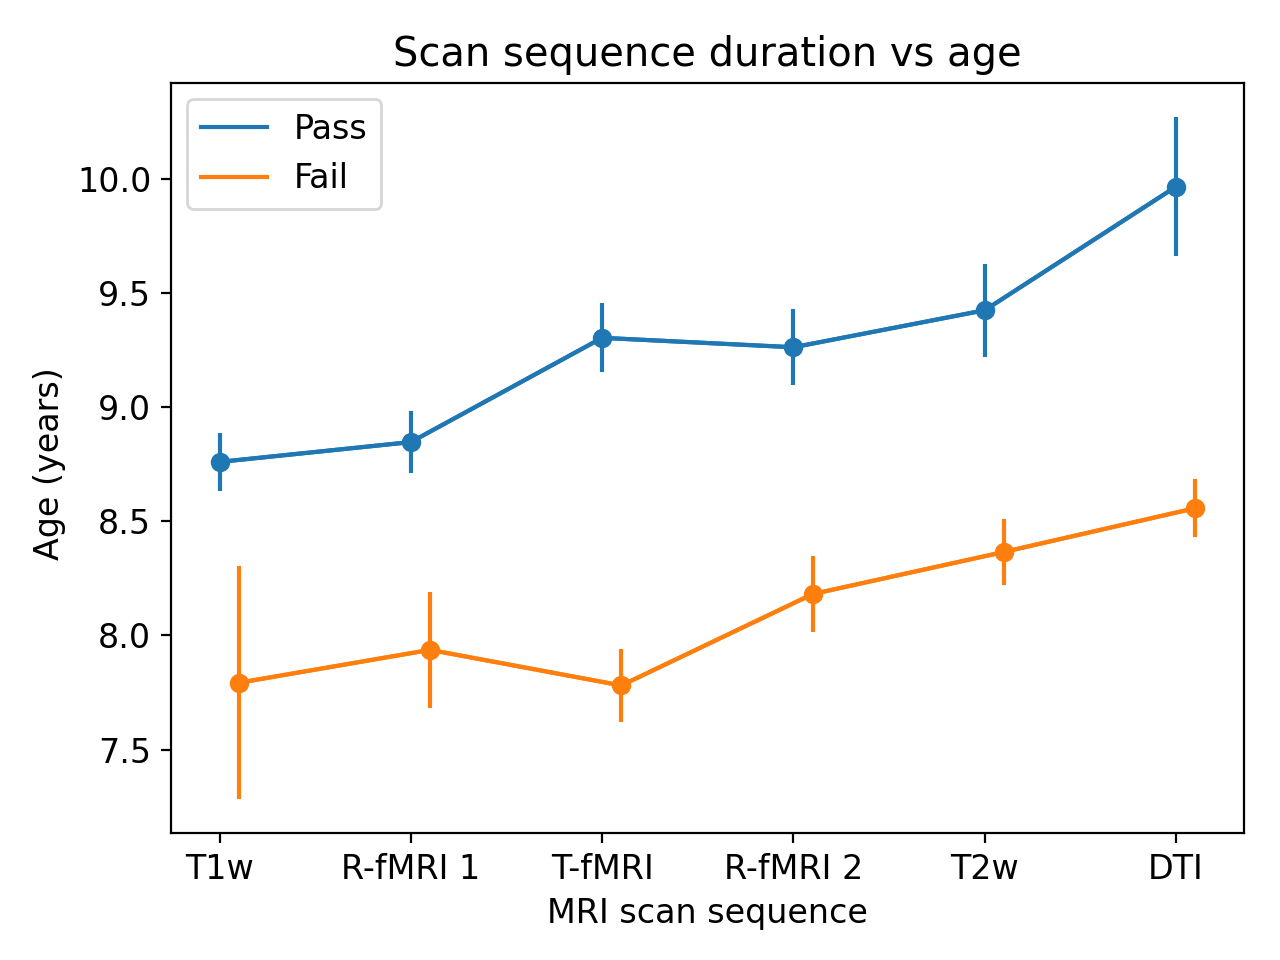

/Users/anish.simhal/anaconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anish.simhal/anaconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


In [24]:
plt.figure()
plt.plot(list(range(0, 6)), pass_mean_list, color='C0', label='Pass')
plt.plot(list(range(0, 6)), pass_mean_list, '.', MarkerSize=12, color='C0')
plt.plot(np.array(list(range(0, 6)))+0.1, fail_mean_list, color='C1', label='Fail')
plt.plot(np.array(list(range(0, 6)))+0.1, fail_mean_list, '.', MarkerSize=12, color='C1')

plt.errorbar(list(range(0, 6)), pass_mean_list, yerr=pass_sd_list)
plt.errorbar(np.array(list(range(0, 6)))+0.1, fail_mean_list, yerr=fail_sd_list)

plt.title('Scan sequence duration vs age')
plt.ylabel('Age (years) ')
plt.xlabel('MRI scan sequence')
plt.xticks(list(range(0, 6)), ['T1w', 'R-fMRI 1', 'T-fMRI', 'R-fMRI 2', 'T2w', 'DTI'])
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.show()